This is a Notebook for Creating Binning features 

In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
# Path of the exploratory analysis project
project_path=os.path.dirname(os.path.abspath(''))
data_path=os.path.join(project_path,"data")
df=pd.read_csv(os.path.join(data_path,"bank.csv"))
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Bin Data Function

In [22]:
def bin_data(df:pd.DataFrame,col_to_bin:str,bins_num:int,result_col="bin"):
    df[result_col] = pd.qcut(df[col_to_bin], bins_num, duplicates='drop')
    return df 

In [36]:
df_bin_count=bin_data(df,"age",4,"bin").groupby("bin",as_index=False)["age"].count().rename(columns={"age":"num"})
df_bin_count["perc"]=df_bin_count["num"]/df_bin_count["num"].sum()
df_bin_count

,bin,num,perc
0,"(17.999, 32.0]",2980,0.266977
1,"(32.0, 39.0]",2889,0.258825
2,"(39.0, 49.0]",2628,0.235442
3,"(49.0, 95.0]",2665,0.238756


In [37]:
def compute_perc_bin(df,col_to_bin,bins_num):
    df_bin_count=bin_data(df,col_to_bin,bins_num,"bin").groupby("bin",as_index=False)["age"].count().rename(columns={"age":"num"})
    df_bin_count["perc"]=df_bin_count["num"]/df_bin_count["num"].sum()
    return df_bin_count

In [41]:
compute_perc_bin(df,"age",7)

,bin,num,perc
0,"(17.999, 30.0]",2007,0.179806
1,"(30.0, 33.0]",1437,0.128740
2,"(33.0, 36.0]",1359,0.121752
3,"(36.0, 41.0]",1691,0.151496
4,"(41.0, 47.0]",1548,0.138685
5,"(47.0, 55.0]",1636,0.146569
6,"(55.0, 95.0]",1484,0.132951


# Bin Data by default label

In [43]:
df_default=df.query("default == 'yes'").reset_index(drop=True)
df_non_default=df.query("default == 'no'").reset_index(drop=True)

In [50]:
compute_perc_bin(df_default,"age",20)

,bin,num,perc
0,"(23.999, 27.0]",20,0.119048
1,"(27.0, 29.0]",8,0.047619
2,"(29.0, 30.4]",6,0.035714
3,"(30.4, 32.0]",11,0.065476
4,"(32.0, 33.0]",7,0.041667
5,"(33.0, 35.0]",11,0.065476
6,"(35.0, 36.0]",6,0.035714
7,"(36.0, 37.15]",7,0.041667
8,"(37.15, 39.5]",8,0.047619
9,"(39.5, 41.0]",9,0.053571


In [51]:
compute_perc_bin(df_non_default,"age",20)

,bin,num,perc
0,"(17.999, 26.0]",677,0.061579
1,"(26.0, 28.0]",521,0.047389
2,"(28.0, 30.0]",775,0.070493
3,"(30.0, 31.0]",489,0.044479
4,"(31.0, 32.0]",473,0.043023
5,"(32.0, 33.0]",457,0.041568
6,"(33.0, 34.0]",461,0.041932
7,"(34.0, 36.0]",881,0.080135
8,"(36.0, 37.0]",363,0.033018
9,"(37.0, 39.0]",688,0.062580


# Binning Age with default label

In [138]:
df_age_default=df[["age","default"]]
df_age_default.head(5)

,age,default
0,59,no
1,56,no
2,41,no
3,55,no
4,54,no


In [139]:
import numpy as np
from scipy import stats

In [140]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [141]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [142]:
def bin_data(df:pd.DataFrame,col_to_bin:str,bins_num:int,result_col="bin"):
    df[result_col],bins = pd.qcut(df[col_to_bin], bins_num, duplicates='drop',retbins=True)
    return {
        "result":df,
        "bins":bins
        }

In [116]:
import seaborn as sns

<Axes: xlabel='job', ylabel='age'>

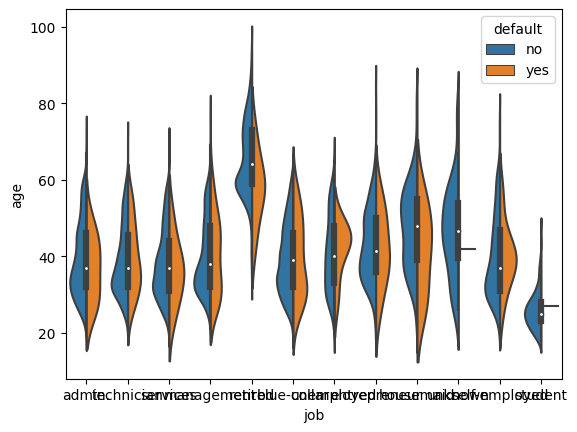

In [143]:
sns.violinplot(data=df, x="job", y="age", split=True, hue="default")

<Axes: xlabel='age'>

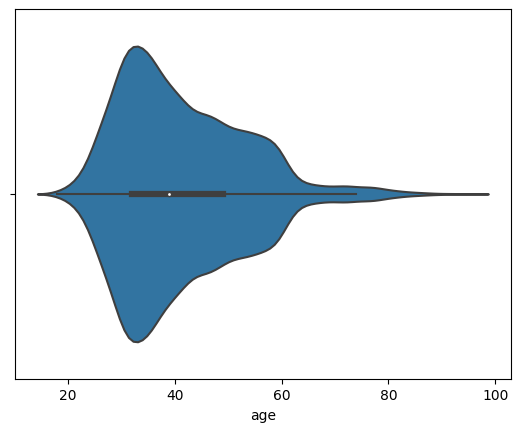

In [119]:
sns.violinplot(x=df["age"])

In [115]:
bin_data(df=df,col_to_bin="balance",bins_num=3)["result"].groupby("bin",as_index=False)["age"].count()

,bin,age
0,"(-6847.001, 235.0]",3724
1,"(235.0, 1158.667]",3717
2,"(1158.667, 81204.0]",3721


In [144]:
def bin_data(df:pd.DataFrame,col_to_bin:str,bins_num:int,result_col="bin"):
    df[result_col] = pd.qcut(df[col_to_bin], bins_num, duplicates='drop')
    return df 

def compute_woe(df,col_label,cat_positive,col_bin="bin"):
    _new_col_names={col_bin:"bin",col_label:"label"}
    df_woe=df.rename(columns=_new_col_names)
    df_woe["label"]=df_woe["label"].apply(lambda x: 1 if x == cat_positive else 0)
    df_woe=df_woe.groupby("bin",as_index=False).agg({"label": ["count", "sum"]})
    df_woe.columns = ["bin", 'num_data_in_bin','num_positive_in_bin']
    df_woe['perc_positive_in_bin'] = df_woe["num_positive_in_bin"] / df_woe["num_positive_in_bin"].sum()
    df_woe['num_negative_in_bin'] = df_woe['num_data_in_bin'] - df_woe["num_positive_in_bin"]
    df_woe['perc_negative_in_bin'] = df_woe['num_negative_in_bin'] / df_woe['num_negative_in_bin'].sum()
    df_woe['woe'] = np.log(df_woe['perc_positive_in_bin']/df_woe['perc_negative_in_bin'])
    return df_woe

def compute_iv(df_woe):
    df_woe["iv"]=(df_woe["perc_positive_in_bin"]-df_woe["perc_negative_in_bin"])*df_woe["woe"]
    return df_woe
def compute_iv_total(df_woe):
    return compute_iv(df_woe)["iv"].sum()

def compute_iv_total_col(df,col_nm,col_label,cat_positive):
    _df_woe=compute_woe(df,col_label,cat_positive,col_bin=col_nm)
    return compute_iv_total(_df_woe)

In [145]:
_col_list=["job","marital","education","housing","deposit"]
_result=[]
for _col in _col_list:
    _result.append((_col,compute_iv_total_col(df=df,col_nm=_col,col_label="default",cat_positive="yes")))
pd.DataFrame(_result,columns=["column","iv"])

,column,iv
0,job,0.215073
1,marital,0.022383
2,education,0.018343
3,housing,0.008258
4,deposit,0.118060


In [78]:
compute_woe(df=df,col_label="default",cat_positive="yes",col_bin="deposit")

,bin,num_data_in_bin,num_positive_in_bin,perc_positive_in_bin,num_negative_in_bin,perc_negative_in_bin,woe
0,no,5873,116,0.690476,5757,0.523649,0.276559
1,yes,5289,52,0.309524,5237,0.476351,-0.431119


In [146]:
data_result=[]
for _bins_num in range(1,30):
    binned_data=bin_data(df,col_to_bin="balance",bins_num=_bins_num)
    df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")
    _result=compute_iv(df_woe)
    _r,_p=stats.spearmanr(_result["bin"],_result["woe"])
    data_result.append((_bins_num,_result["iv"].sum(),df_woe["perc_positive_in_bin"].min(),_r,_p))
data_result=pd.DataFrame(data_result,columns=["num_bin","iv","min_perc_positive","spearman_r","spearman_p"])

In [156]:
_bins_num=7
binned_data=bin_data(df,col_to_bin="balance",bins_num=_bins_num)
df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")
_result=compute_iv(df_woe)

In [157]:
_result

,bin,num_data_in_bin,num_positive_in_bin,perc_positive_in_bin,num_negative_in_bin,perc_negative_in_bin,woe,iv
0,"(-6847.001, 4.0]",1599,108,0.642857,1491,0.135619,1.556070,0.789297
1,"(4.0, 168.0]",1596,32,0.190476,1564,0.142259,0.291875,0.014073
2,"(168.0, 391.286]",1589,12,0.071429,1577,0.143442,-0.697232,0.050210
3,"(391.286, 755.0]",1597,4,0.023810,1593,0.144897,-1.805939,0.218677
4,"(755.0, 1435.0]",1594,10,0.059524,1584,0.144079,-0.883983,0.074745
5,"(1435.0, 2987.0]",1593,1,0.005952,1592,0.144806,-3.191605,0.443167
6,"(2987.0, 81204.0]",1594,1,0.005952,1593,0.144897,-3.192233,0.443544


In [147]:
data_result

,num_bin,iv,min_perc_positive,spearman_r,spearman_p
0,1,0.000000,1.000000,NaN,NaN
1,2,1.024417,0.083333,-1.000000,NaN
2,3,1.330994,0.041667,-1.000000,0.000000e+00
3,4,1.804673,0.011905,-1.000000,0.000000e+00
4,5,1.753752,0.011905,-0.900000,3.738607e-02
5,6,1.810844,0.005952,-1.000000,0.000000e+00
6,7,2.033714,0.005952,-0.964286,4.541492e-04
7,8,1.956353,0.005952,-0.928571,8.629682e-04
8,9,1.945262,0.005952,-0.933333,2.358998e-04
9,10,1.954965,0.005952,-0.927273,1.120345e-04


In [128]:
_bins_num=8
binned_data=bin_data(df,col_to_bin="balance",bins_num=_bins_num)
df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")

AttributeError: 'dict' object has no attribute 'rename'

In [81]:
df_woe

,bin,num_data_in_bin,num_positive_in_bin,perc_positive_in_bin,num_negative_in_bin,perc_negative_in_bin,woe
0,"(-6847.001, 0.0]",1462,103,0.613095,1359,0.123613,1.601366
1,"(0.0, 122.0]",1330,34,0.202381,1296,0.117882,0.540464
2,"(122.0, 299.0]",1395,11,0.065476,1384,0.125887,-0.653697
3,"(299.0, 550.0]",1396,6,0.035714,1390,0.126433,-1.264159
4,"(550.0, 951.0]",1394,5,0.029762,1389,0.126342,-1.445760
5,"(951.0, 1708.0]",1395,7,0.041667,1388,0.126251,-1.108568
6,"(1708.0, 3342.875]",1394,1,0.005952,1393,0.126705,-3.058074
7,"(3342.875, 81204.0]",1396,1,0.005952,1395,0.126887,-3.059509


In [64]:
binned_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,bin
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,"(1708.0, 3342.875]"
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,"(0.0, 122.0]"
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,"(951.0, 1708.0]"
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(1708.0, 3342.875]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(122.0, 299.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(0.0, 122.0]"
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(550.0, 951.0]"
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(0.0, 122.0]"
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(-6847.001, 0.0]"


In [62]:
data_result

,num_bin,iv,min_perc_positive,spearman_r,spearman_p
0,1,0.000000,1.000000,NaN,NaN
1,2,1.024417,0.083333,-1.000000,NaN
2,3,1.330994,0.041667,-1.000000,0.000000e+00
3,4,1.804673,0.011905,-1.000000,0.000000e+00
4,5,1.753752,0.011905,-0.900000,3.738607e-02
5,6,1.810844,0.005952,-1.000000,0.000000e+00
6,7,2.033714,0.005952,-0.964286,4.541492e-04
7,8,1.956353,0.005952,-0.928571,8.629682e-04
8,9,1.945262,0.005952,-0.933333,2.358998e-04
9,10,1.954965,0.005952,-0.927273,1.120345e-04


In [158]:
data_result=[]
for _bins_num in range(1,30):
    binned_data=bin_data(df,col_to_bin="age",bins_num=_bins_num)
    df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")
    _result=compute_iv(df_woe)
    _r,_p=stats.spearmanr(_result["bin"],_result["woe"])
    data_result.append((_bins_num,_result["iv"].sum(),df_woe["perc_positive_in_bin"].min(),_r,_p))
data_result=pd.DataFrame(data_result,columns=["num_bin","iv","min_perc_positive","spearman_r","spearman_p"])


In [159]:
data_result.query("min_perc_positive > 0.05")

,num_bin,iv,min_perc_positive,spearman_r,spearman_p
0,1,0.000000,1.000000,NaN,NaN
1,2,0.002747,0.500000,1.000000,NaN
2,3,0.010171,0.291667,-0.500000,0.666667
3,4,0.048642,0.178571,-0.400000,0.600000
4,5,0.050042,0.130952,-0.300000,0.623838
5,6,0.054025,0.101190,-0.314286,0.544093
6,7,0.069733,0.077381,-0.035714,0.939408
7,8,0.093251,0.059524,-0.119048,0.778886


In [35]:
_bins_num=8
binned_data=bin_data(df,col_to_bin="age",bins_num=_bins_num)
df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")

In [36]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,bin
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,"(56.0, 95.0]"
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,"(49.0, 56.0]"
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,"(39.0, 43.0]"
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(49.0, 56.0]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(49.0, 56.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(32.0, 35.0]"
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(35.0, 39.0]"
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(29.0, 32.0]"
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(39.0, 43.0]"


In [42]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,bin
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,"(56.0, 95.0]"
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,"(49.0, 56.0]"
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,"(39.0, 43.0]"
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(49.0, 56.0]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(49.0, 56.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(32.0, 35.0]"
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(35.0, 39.0]"
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(29.0, 32.0]"
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(39.0, 43.0]"


In [41]:
df.groupby("job",as)

In [49]:
compute_iv(compute_woe(df=df,col_label="default",cat_positive="yes",col_bin="job")).sum()

bin                     admin.blue-collarentrepreneurhousemaidmanageme...
num_data_in_bin                                                     11162
num_positive_in_bin                                                   168
perc_positive_in_bin                                                  1.0
num_negative_in_bin                                                 10994
perc_negative_in_bin                                                  1.0
woe                                                             -1.425841
iv                                                               0.215073
dtype: object

In [50]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [37]:
df_woe

,bin,num_data_in_bin,num_positive_in_bin,perc_positive_in_bin,num_negative_in_bin,perc_negative_in_bin,woe
0,"(17.999, 29.0]",1551,28,0.166667,1523,0.138530,0.184908
1,"(29.0, 32.0]",1429,17,0.101190,1412,0.128434,-0.238408
2,"(32.0, 35.0]",1391,18,0.107143,1373,0.124886,-0.153241
3,"(35.0, 39.0]",1498,21,0.125000,1477,0.134346,-0.072105
4,"(39.0, 43.0]",1169,19,0.113095,1150,0.104603,0.078063
5,"(43.0, 49.0]",1459,35,0.208333,1424,0.129525,0.475264
6,"(49.0, 56.0]",1358,20,0.119048,1338,0.121703,-0.022058
7,"(56.0, 95.0]",1307,10,0.059524,1297,0.117973,-0.684083


In [13]:
binned_data

,age,default,bin
0,59,no,"(56.0, 95.0]"
1,56,no,"(49.0, 56.0]"
2,41,no,"(39.0, 43.0]"
3,55,no,"(49.0, 56.0]"
4,54,no,"(49.0, 56.0]"
...,...,...,...
11157,33,no,"(32.0, 35.0]"
11158,39,no,"(35.0, 39.0]"
11159,32,no,"(29.0, 32.0]"
11160,43,no,"(39.0, 43.0]"


In [124]:
binned_data=bin_data(df_age_default,col_to_bin="age",bins_num=22)
df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")
_result=compute_iv(df_woe)
r,p=stats.spearmanr(_result["bin"],_result["num_positive_in_bin"])

/Users/ezratampubolon/PythonProjects/exploratory-analysis/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [127]:
_result

,bin,num_data_in_bin,num_positive_in_bin,perc_positive_in_bin,num_negative_in_bin,perc_negative_in_bin,woe,iv
0,"(17.999, 26.0]",685,8,0.047619,677,0.061579,-0.257089,3.588958e-03
1,"(26.0, 28.0]",538,17,0.101190,521,0.047389,0.758604,4.081366e-02
2,"(28.0, 29.0]",328,3,0.017857,325,0.029562,-0.504072,5.899878e-03
3,"(29.0, 31.0]",952,13,0.077381,939,0.085410,-0.098725,7.926910e-04
4,"(31.0, 32.0]",477,4,0.023810,473,0.043023,-0.591660,1.136812e-02
5,"(32.0, 33.0]",464,7,0.041667,457,0.041568,0.002368,2.333125e-07
6,"(33.0, 34.0]",466,5,0.029762,461,0.041932,-0.342819,4.172129e-03
7,"(34.0, 35.0]",461,6,0.035714,455,0.041386,-0.147397,8.360246e-04
8,"(35.0, 36.0]",432,6,0.035714,426,0.038748,-0.081539,2.473990e-04
9,"(36.0, 37.0]",370,7,0.041667,363,0.033018,0.232648,2.012095e-03


In [1]:
r

NameError: name 'r' is not defined

In [106]:
r,p=stats.spearmanr(_result["bin"],_result["num_positive_in_bin"])

/Users/ezratampubolon/PythonProjects/exploratory-analysis/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [108]:
p

0.5986683040717657

In [97]:
_result

,bin,num_data_in_bin,num_positive_in_bin,perc_positive_in_bin,num_negative_in_bin,perc_negative_in_bin,woe,iv
0,"(17.999, 28.0]",1223,25,0.148810,1198,0.108969,0.311608,0.012415
1,"(28.0, 31.0]",1280,16,0.095238,1264,0.114972,-0.188307,0.003716
2,"(31.0, 33.0]",941,11,0.065476,930,0.084592,-0.256148,0.004896
3,"(33.0, 36.0]",1359,17,0.101190,1342,0.122067,-0.187562,0.003916
4,"(36.0, 39.0]",1066,15,0.089286,1051,0.095598,-0.068306,0.000431
5,"(39.0, 42.0]",920,16,0.095238,904,0.082227,0.146900,0.001911
6,"(42.0, 47.0]",1253,27,0.160714,1226,0.111515,0.365466,0.017981
7,"(47.0, 52.0]",1048,19,0.113095,1029,0.093597,0.189237,0.003690
8,"(52.0, 58.0]",1108,16,0.095238,1092,0.099327,-0.042036,0.000172
9,"(58.0, 95.0]",964,6,0.035714,958,0.087138,-0.891947,0.045868


In [102]:
import stats

In [103]:
stats.spearmanr

AttributeError: module 'stats' has no attribute 'spearmanr'

In [95]:
binned_data

,age,default,bin
0,59,no,"(58.0, 95.0]"
1,56,no,"(52.0, 58.0]"
2,41,no,"(39.0, 42.0]"
3,55,no,"(52.0, 58.0]"
4,54,no,"(52.0, 58.0]"
...,...,...,...
11157,33,no,"(31.0, 33.0]"
11158,39,no,"(36.0, 39.0]"
11159,32,no,"(31.0, 33.0]"
11160,43,no,"(42.0, 47.0]"


In [94]:
binned_data.groupby("bin").mean()

/var/folders/6y/6950x6wj5s11qnv2r99pvgt80000gn/T/ipykernel_65944/3054655618.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  binned_data.groupby("bin").mean()


,age
bin,
"(17.999, 28.0]",25.714636
"(28.0, 31.0]",30.131250
"(31.0, 33.0]",32.493092
"(33.0, 36.0]",34.974982
"(36.0, 39.0]",37.974672
"(39.0, 42.0]",40.966304
"(42.0, 47.0]",45.025539
"(47.0, 52.0]",49.937977
"(52.0, 58.0]",55.385379


In [ ]:
stats.spearmanr(_result.mean().X, d2.mean().Y)

In [74]:
data_result=[]
for _bins_num in range(1,20):
    binned_data=bin_data(df_age_default,col_to_bin="age",bins_num=_bins_num)
    df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")
    compute_iv(df_woe)
    data_result.append((_bins_num,compute_iv(df_woe),df_woe["perc_positive_in_bin"].min()))

In [75]:
pd.DataFrame(data_result,columns=["num_bin","iv","perc_positive"])

,num_bin,iv,perc_positive
0,1,0.000000,1.000000
1,2,0.002747,0.500000
2,3,0.010171,0.291667
3,4,0.048642,0.178571
4,5,0.050042,0.130952
5,6,0.054025,0.101190
6,7,0.069733,0.077381
7,8,0.093251,0.059524
8,9,0.125957,0.035714
9,10,0.094995,0.035714


In [83]:
binned_data=bin_data(df_age_default,col_to_bin="age",bins_num=4)
df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")

In [84]:
df_woe

,bin,num_data_in_bin,num_positive_in_bin,perc_positive_in_bin,num_negative_in_bin,perc_negative_in_bin,woe
0,"(17.999, 32.0]",2980,45,0.267857,2935,0.266964,0.003341
1,"(32.0, 39.0]",2889,39,0.232143,2850,0.259232,-0.110372
2,"(39.0, 49.0]",2628,54,0.321429,2574,0.234128,0.316909
3,"(49.0, 95.0]",2665,30,0.178571,2635,0.239676,-0.294300


In [71]:
df_woe

,bin,num_data_in_bin,num_positive_in_bin,perc_positive_in_bin,num_negative_in_bin,perc_negative_in_bin,woe,pre_iv
0,"(17.999, 28.0]",1223,25,0.148810,1198,0.108969,0.311608,0.012415
1,"(28.0, 31.0]",1280,16,0.095238,1264,0.114972,-0.188307,0.003716
2,"(31.0, 33.0]",941,11,0.065476,930,0.084592,-0.256148,0.004896
3,"(33.0, 36.0]",1359,17,0.101190,1342,0.122067,-0.187562,0.003916
4,"(36.0, 39.0]",1066,15,0.089286,1051,0.095598,-0.068306,0.000431
5,"(39.0, 42.0]",920,16,0.095238,904,0.082227,0.146900,0.001911
6,"(42.0, 47.0]",1253,27,0.160714,1226,0.111515,0.365466,0.017981
7,"(47.0, 52.0]",1048,19,0.113095,1029,0.093597,0.189237,0.003690
8,"(52.0, 58.0]",1108,16,0.095238,1092,0.099327,-0.042036,0.000172
9,"(58.0, 95.0]",964,6,0.035714,958,0.087138,-0.891947,0.045868


In [66]:
binned_data=bin_data(df_age_default,col_to_bin="age",bins_num=10)
df_woe=compute_woe(df=binned_data,col_label="default",cat_positive="yes")
compute_iv(df_woe)


0.09499515150418145

In [82]:
df_age_default['age'].describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [70]:
df_woe["perc_positive_in_bin"].min()

0.03571428571428571

In [67]:
binned_data

,age,default,bin
0,59,no,"(58.0, 95.0]"
1,56,no,"(52.0, 58.0]"
2,41,no,"(39.0, 42.0]"
3,55,no,"(52.0, 58.0]"
4,54,no,"(52.0, 58.0]"
...,...,...,...
11157,33,no,"(31.0, 33.0]"
11158,39,no,"(36.0, 39.0]"
11159,32,no,"(31.0, 33.0]"
11160,43,no,"(42.0, 47.0]"
